# ECE 3 : Homework 3

## Instructions

To get started, you should go through the following steps.
- Rename this jupyter notebook by adding your name: e.g. `ECE3_HW3_<your-name>.ipynb`.
- Complete all the exercises by directly editing your notebook.
- Make sure that the coding portions run without errors.

## Problem 1 - Clustering with k-means algorithm (Total points 30: 10 + 5 + 10 + 5)




For this exercise we will use the "Digits" dataset from the scikit-learn package. 

The following chunk of code loads the dataset and prints a full description of it. Run it and carefully go through the description.


In [1]:
import numpy as np
from sklearn.datasets import load_digits

dataset = load_digits()
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### (a) The dataset contains 1797 images of handwritten digits (the description says that the number of instances is 5620 but that's a mistake). Each image has resolution 8x8 pixels. Here the images have been reshaped to vectors of size 64x1. Confirm this by running the following chunk of code.

In [2]:
X = dataset.images # images go here
y = dataset.target # labels go here
z = dataset.data

print("The images are inlcuded in a matrix of shape:", X.shape)
print("The labels are included in a vector of length:", y.shape)
print("alternative formatting for images:", z.shape)

The images are inlcuded in a matrix of shape: (1797, 8, 8)
The labels are included in a vector of length: (1797,)
alternative formatting for images: (1797, 64)


#### (b) Let's take a look at our data and labels, display the 11th and the 231th images and their respective labels:

The 11th image is one of digit 0:


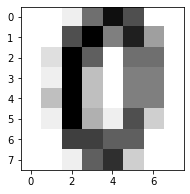

The 231th image is one of digit 5:


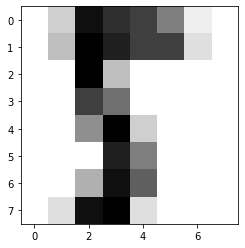

In [3]:
import matplotlib.pyplot as plt

# Display the first digit
plt.figure(1, figsize=(3, 3))

# we have saved the images as 64x1 vectors, for the purpose of plotting we will
# convert them to size 8x8. For the rest of the questions just use array X
images = X.reshape(-1, 8, 8)

print('The 11th image is one of digit {}:'.format(y[10]))
plt.imshow(images[10,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print('The 231th image is one of digit {}:'.format(y[230]))
plt.imshow(images[230,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In this exercise we will ignore the existence of the labels and we will assign our images to different clusters based only on the images themselves.

This is called **clustering** and it's an **unsupervised** learning task, as it's done with no knowledge of the true labels. In contrast, both **classification** and **regression** are **supervised** learning tasks, as to train our models we need to know the true labels/response variable of the training data.

### The K-means algorithm

k-means is an algorithm that performs clustering. k is a parameter that indicates the number of clusters. After we choose what k to run the algorithm for, the algorithm proceeds as follows:

1.  We pick k points from the dataset at random. We call these points the "centroids" or the "representatives "of the clusters.
2.  For each point in the dataset we calculate its distance to the k centroids and we assign to the cluster with the closest centroid.
3. For each cluster, we calculate a new centroid as the mean of its points. These new centroids don't have to belong to the dataset.
4. We repeat steps 2 & 3 until the centroid positions don't change.

In our example, we know that we're dealing with digits so we will set k=10.

#### (c) Use sklearn's KMeans class to perform K-means clustering on the digits dataset. Store the result in a NumPy vector.

In [4]:
from sklearn.cluster import KMeans

# Type your solution below

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(dataset.data)

y_pred = kmeans.predict(dataset.data)
#test code
print(y_pred)
print(type(y_pred))
print(dataset.target)

[5 9 9 ... 9 4 4]
<class 'numpy.ndarray'>
[0 1 2 ... 8 9 8]


### Clustering performance metrics

After performing clustering, you have assigned a label to each point in the dataset. However, this isn't necessarily the same label as the true label. Here for example, you may have correctly grouped all zeros to the same cluster but assigned this cluster the label 5. Thus, accuracy (as it was defined in Problem 1) it's not an informative metric for the performance of clustering algorithms.

An appropriate metric for clustering performance is the **Adjusted Rand index**, which is a function that measures the similarity between the true and the predicted label assignments, ignoring permutations.

#### (d) Calculate the algorithm's adjusted rand index using sklearn's built-in method and print out the result.

In [5]:
from sklearn.metrics import adjusted_rand_score

# type your solution below

ari = adjusted_rand_score(y_pred,dataset.target) 
print(ari)

0.6703800183468681


## Problem 2 - Matrix Norm and Distance (Total points: $40 = 5+8+2+5+8+6+6$)

**This is not a Python problem. You can optionally chose to verify your answers using Python**


Let $A=\begin{bmatrix}
2&3&1\\
3&1&5
\end{bmatrix}$ and 
$B=\begin{bmatrix}
1&3&2\\
3&0&4
\end{bmatrix}$.


 a) Calculate the norm of matrix $A$.

 b) Let us multiply matrix $A$ by a scalar 2. Calculate $2A$ and the norm of matrix $2A$ and $\frac{||2A||}{||A||}$.

 c) For a general scalar $k$, write an expression for $||kA||$ that contains only $k$ and $||A||$.

 d) Calculate the distance between matrix $A$ and $B$.

 e) Compute the value of $(3A -B)^T$.

 f) Consider the 2 vectors forming the rows of A. Are they linearly independent ?

 g) Consider the 3 vectors forming the columns of B. Are they linearly independent ?



**Write your answers here**

a) norm of A is $\sqrt{(A_{0,0}^2+A_{0,1}^2...+A_{i,j}^2)}=\sqrt{2^2+3^2+1^2+3^2+1^2+5^2)}=\sqrt{49}=7$

b) $2A=\begin{bmatrix}
2*2&2*3&2*1\\
2*3&2*1&2*5
\end{bmatrix}=\begin{bmatrix}
4&6&2\\
6&2&10
\end{bmatrix}$

$||2A||=\sqrt{4^2+6^2+2^2+6^2+2^2+10^2)}=\sqrt{196}=14$

$\frac{||2A||}{||A||}=\frac{14}{7}=2$

c) $||kA||=|k|||A||$ 

d) distance = $||A-B||=\sqrt{(A_{0,0}-B_{0,0})^2+...(A_{i,j}-B_{i,j})^2}=\sqrt{(2-1)^2+(3-3)^2+(1-2)^2+(3-3)^2+(1-0)^2+(5-4)^2)}=\sqrt{4}=2$

e) $(3A -B)^T = (\begin{bmatrix}
6&9&3\\
9&3&15
\end{bmatrix}-\begin{bmatrix}
1&3&2\\
3&0&4
\end{bmatrix})^T=\begin{bmatrix}
5&6&1\\
6&3&11
\end{bmatrix}^T=\begin{bmatrix}
5&6\\
6&3\\
1&11
\end{bmatrix}$ 

f) $\begin{bmatrix}
2\\
3\\
1
\end{bmatrix}$and$\begin{bmatrix}
3\\
1\\
5
\end{bmatrix}$   evaluating via REF: $\begin{bmatrix}
2&3\\
3&1\\
1&5
\end{bmatrix}=\begin{bmatrix}
1&0\\
0&1\\
0&0
\end{bmatrix}$ 

since each column contains a pivot, these vectors are linearly independent. There is no scalar value that can transform one vector onto the other. Thus the vectors are linearly independent.

g) $\begin{bmatrix}
1\\
3\end{bmatrix}\begin{bmatrix}
3\\
0\end{bmatrix}\begin{bmatrix}
2\\
4\end{bmatrix} $evaluating via RREF:$ \begin{bmatrix}
1&0&\frac{4}{3}\\
0&1&\frac{2}{9}
\end{bmatrix}$

since not every column contains a pivot point, there is a free variable, thus there are multiple non-zero combinations that could map the vectors onto each other. Thus, the vectors are not linearly independent.


In [6]:
import numpy as np

A = np.array([[2, 3, 1], [3, 1, 5]])
B = np.array([[1,3,2],[3,0,4]])
print("part a:")
print(np.linalg.norm(A))
print("part b,i:")
print(2*A)
print("part b,ii:")
print(np.linalg.norm(2*A))
print("part b,iii:")
print(np.linalg.norm(2*A)/np.linalg.norm(A))
print("part d:")
print(np.linalg.norm(np.subtract(A,B)))
print("part e:")
print(np.subtract(3*A,B).T)



part a:
7.0
part b,i:
[[ 4  6  2]
 [ 6  2 10]]
part b,ii:
14.0
part b,iii:
2.0
part d:
2.0
part e:
[[ 5  6]
 [ 6  3]
 [ 1 11]]
